In [19]:
import pandas as pd

import numpy as np

In [20]:
filename = 'metamorphosis_clean.txt'

In [21]:
file = open(filename , 'r')

In [22]:
text = file.read()

In [23]:
file.close()

In [47]:
len(text)

119166

In [29]:
import string
import spacy
import re

from spacy.lang.en.stop_words import STOP_WORDS

In [30]:
punct = string.punctuation

In [31]:
nlp = spacy.load('en_core_web_sm')

In [49]:
def change_into_tokens(text):
    text = re.sub('\W+' , ' ', text)
    
    doc = nlp(text)
    
    tokens=  []
    
    cleaned_text = []
    
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
            
        tokens.append(temp)
        
        
    for token in tokens:
        if token not in STOP_WORDS and token not in punct and len(token)>2:
            cleaned_text.append(token)
            
    return cleaned_text

In [61]:
change_into_tokens(text[:53])

['morning', 'gregor', 'samsa', 'wake', 'troubled']

In [63]:
cleaned_text = change_into_tokens(text)

In [65]:
from wordcloud import WordCloud

In [66]:
text_for_wordcloud = ' '.join(cleaned_text)

In [72]:
text_for_wordcloud[:10]

'morning gr'

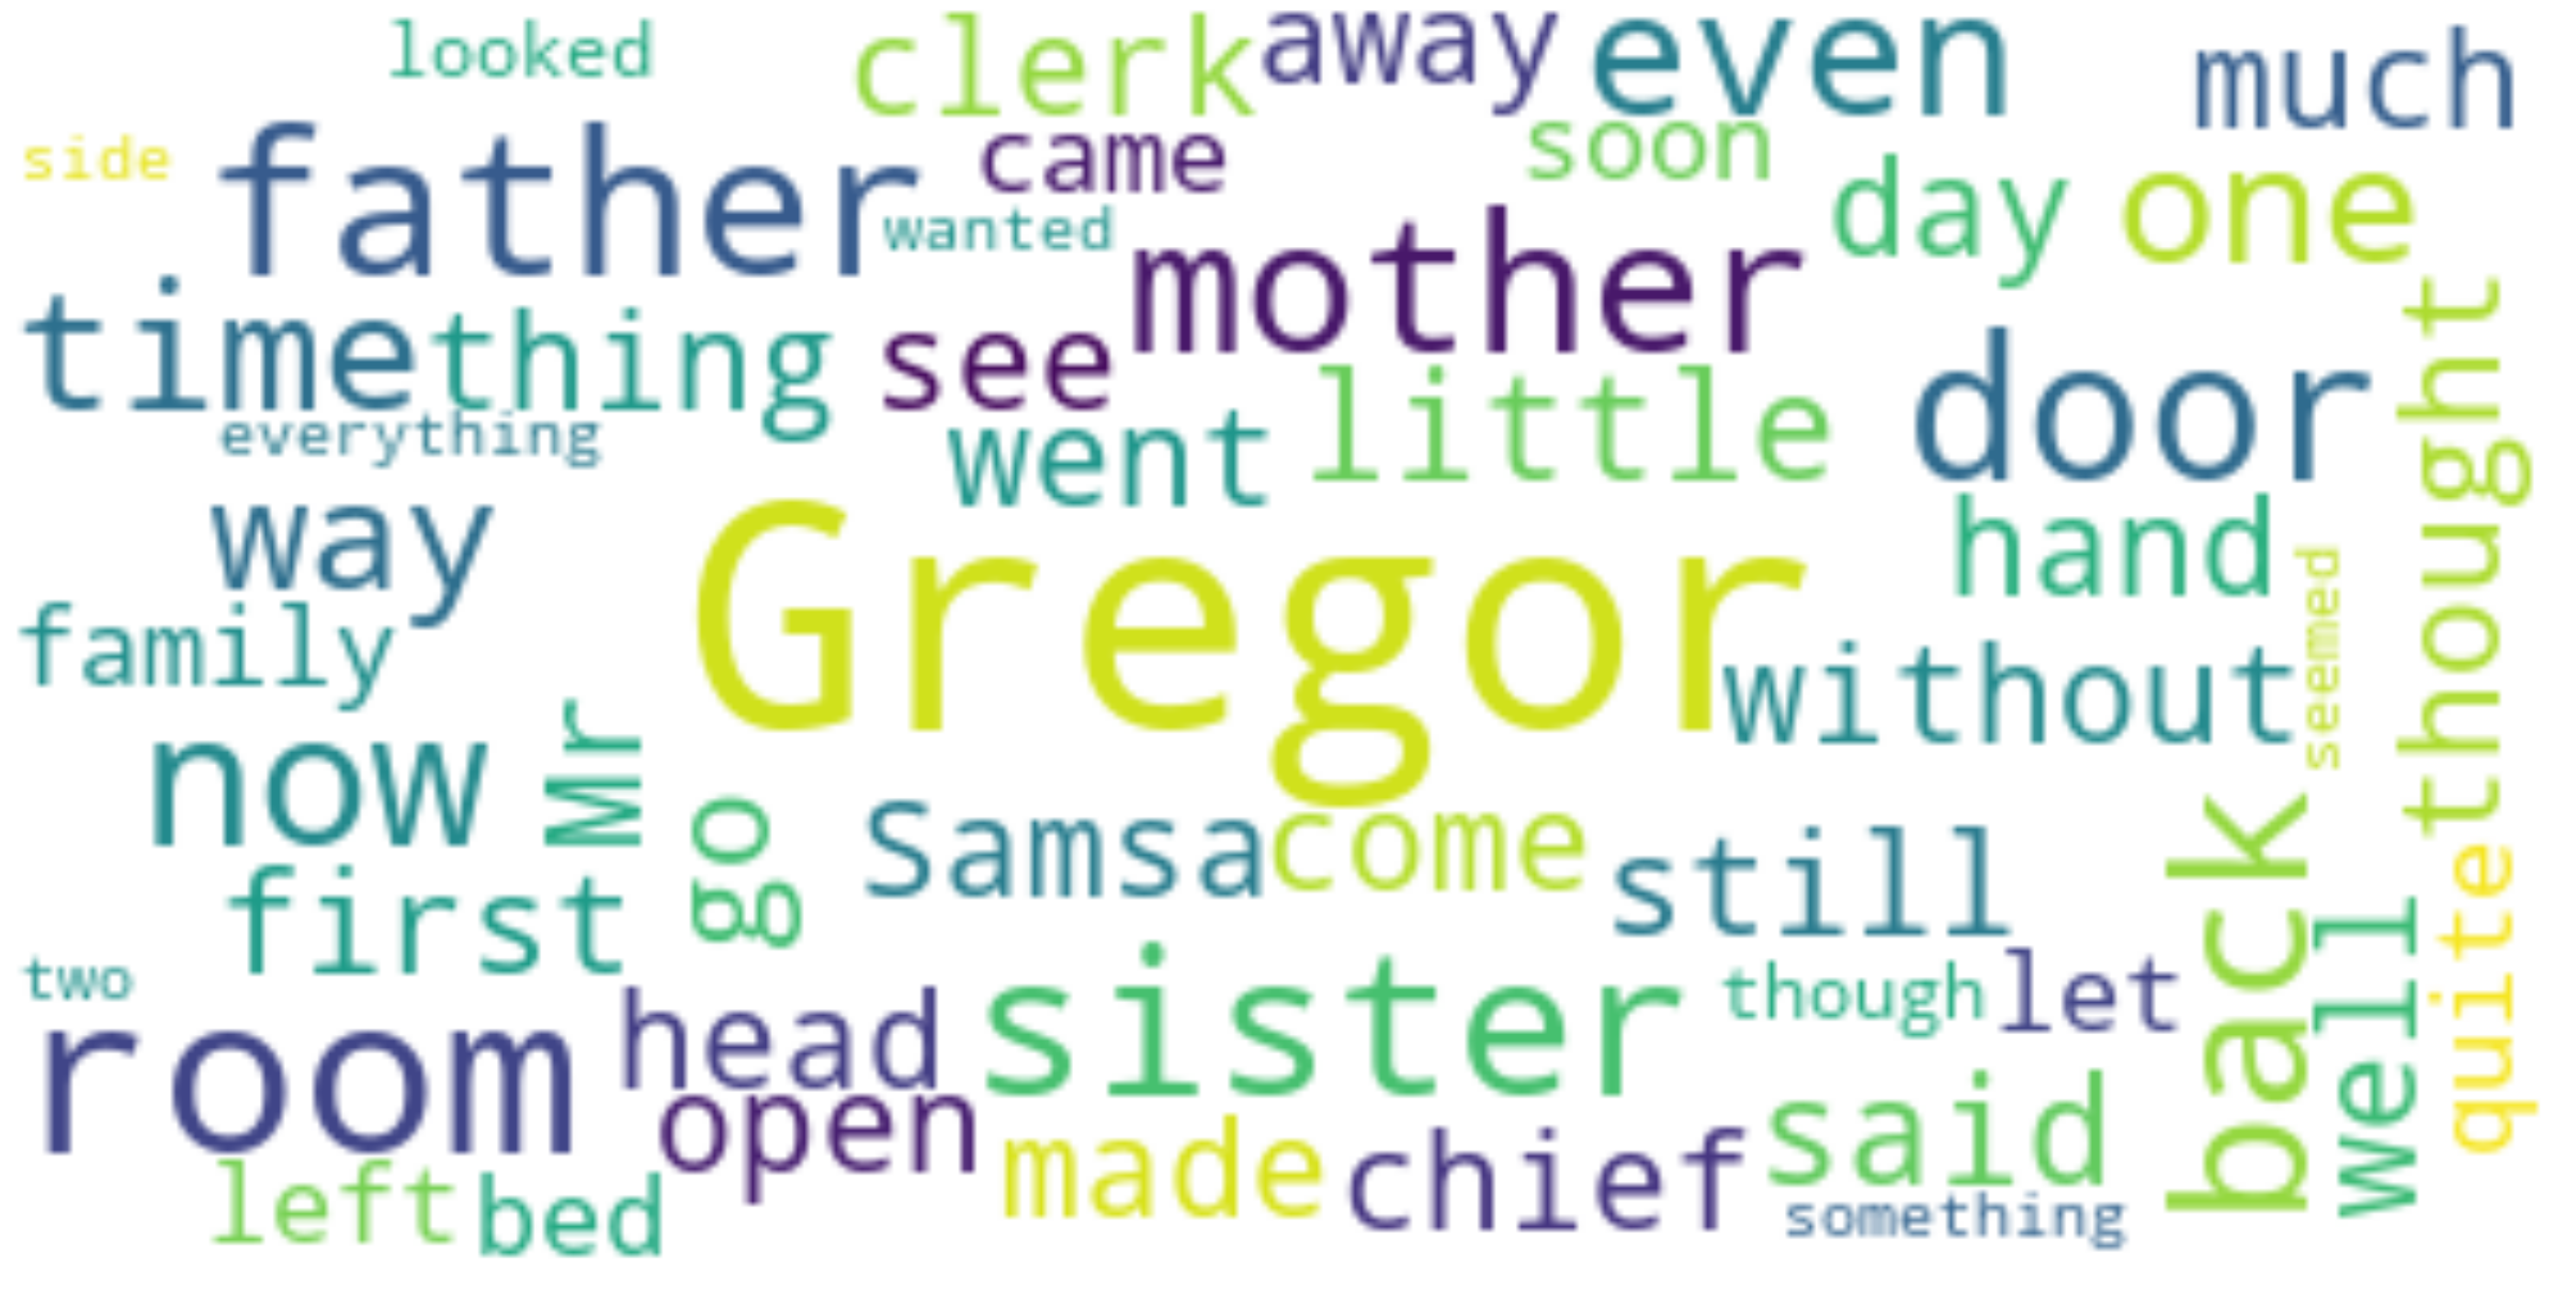

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50,50))
wordcloud = WordCloud(max_font_size=50 , collocations = False , max_words=50 , background_color='white' ).generate(text)
ax.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
#now count the word occurances

from collections import Counter

In [95]:
Counter(' '.join(cleaned_text).split()).most_common()[:5]

[('gregor', 298),
 ('room', 133),
 ('father', 102),
 ('sister', 101),
 ('door', 97)]